<a href="https://colab.research.google.com/github/Anne-Izel/An-lise-explorat-ria---Covid-19/blob/main/C%C3%B3pia_de_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

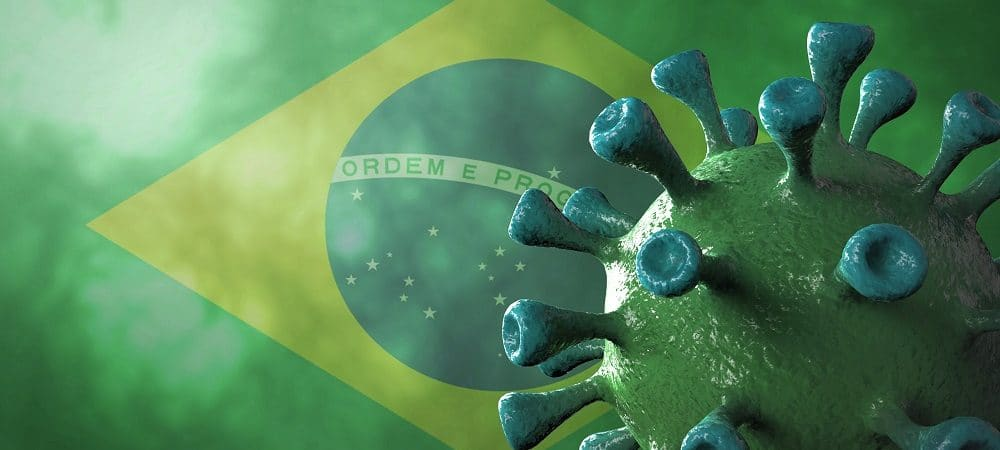

# Introdução :



O projeto foi realizado com os dados do covid 19 no Brasil, no perido entre 25-02-2020, 31-07-2020, vamos explorar o número de casos,óbitos, recuperados, e será abordado a sazonalidade.

O Projeto vai ser baseado sobre o covid 19, no estado de SP no qual teve a maior taxa de casos.





In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

# Realizando uma análise exploratória .
Exibindo as 10 primeiras linhas.

In [2]:
df_geral = pd.read_csv("cases-brazil-states.csv")
df_geral.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
5,9,2020-02-27,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
7,9,2020-02-28,Brazil,TOTAL,TOTAL,0,0,1,2,0,1,0.0,0.00095,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
9,9,2020-02-29,Brazil,TOTAL,TOTAL,0,0,0,2,0,2,0.0,0.00095,0.0,NaN,NaN,NaN,NaN


## Exibindo as ultimas 10 linhas.

In [3]:
df_geral.tail(10) #Esta função retorna as últimas n linhas do objeto com base na posição. É útil para verificar dados rapidamente.

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
3952,31,2020-07-31,Brazil,RJ,TOTAL,129,13477,1853,165495,13477,165495,78.05992,958.56094,0.08143,141413.0,23822.0,193183.0,1118.93216
3953,31,2020-07-31,Brazil,RN,TOTAL,102,1885,1137,51700,1777,50416,53.75190,1474.25626,0.03646,22901.0,62115.0,132348.0,3773.98197
3954,31,2020-07-31,Brazil,RO,TOTAL,8,872,585,38992,872,38992,49.06526,2193.98219,0.02236,30600.0,36827.0,119528.0,6725.54122
3955,31,2020-07-31,Brazil,RR,TOTAL,8,513,707,32723,505,32016,84.68686,5401.96546,0.01568,8987.0,277.0,56046.0,9252.16381
3956,31,2020-07-31,Brazil,RS,TOTAL,51,1876,219,66692,1876,66692,16.48906,586.18791,0.02813,57655.0,7272.0,347092.0,3050.75775
3957,31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
3958,31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
3960,31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
3961,31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


# Pergunta: A qual período de tempo os dados se referem?

In [4]:
print(min(df_geral['data']))
print(max(df_geral['data']))

2020-02-25
2020-07-31


In [ ]:
#df_geral.isna()

# O que podemos ver aqui?
Temos um estado chamado "Total". O que significado? São todas as várias do Brasil,porém queremos trabalhar com os dados separados para cada estado, além disso,não sabemos se essa variável “data” de fato está no formato de data. Ela pode ser uma string, por exemplo. Então vou forçar que ela esteja como uma data.

In [5]:
df = df_geral[df_geral['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_geral['data']).dt.date
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


In [ ]:
#df_total[df_total.estado == "RJ"]

# Total de casos e obitos ao redor do Brasil.

In [6]:
Casos = df_geral['Casos'].max()
Obitos = df_geral['Obitos'].max()

print("Total de casos ao redor do Brazil: {:,}".format(Casos))
print("Total de mortes ao redor do Brazil: {:,}".format(Obitos))

Total de casos ao redor do Brazil: 2,670,451
Total de mortes ao redor do Brazil: 92,728


# Total de novos casos e novos obitos ao redor do Brasil.

In [7]:
novosCasos = df_geral['novosCasos'].max()
novosObitos = df_geral['novosObitos'].max()

print("Total de casos ao redor do Brazil: {:,}".format(novosCasos))
print("Total de mortes ao redor do Brazil: {:,}".format(novosObitos))

Total de casos ao redor do Brazil: 66,150
Total de mortes ao redor do Brazil: 1,508


# Agora vamos verificar qual estado possui o maior número de obitos, para isso será utilizada uma representação gráfica por linhas, e as cores representando cada estado.

Text(0, 0.5, 'Óbitos')

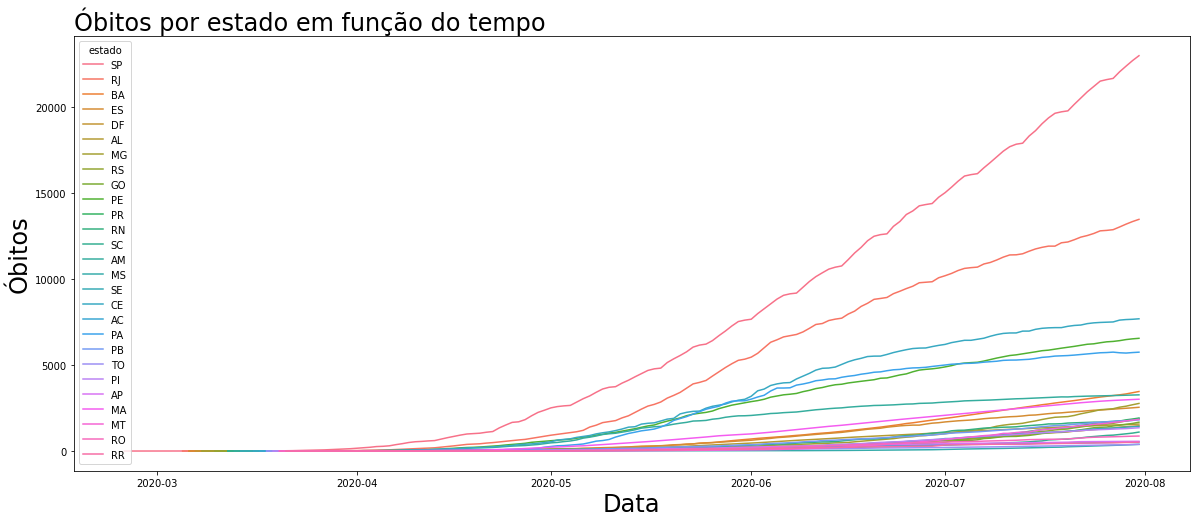

In [8]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Óbitos',fontsize=24)

Text(0, 0.5, 'Óbitos')

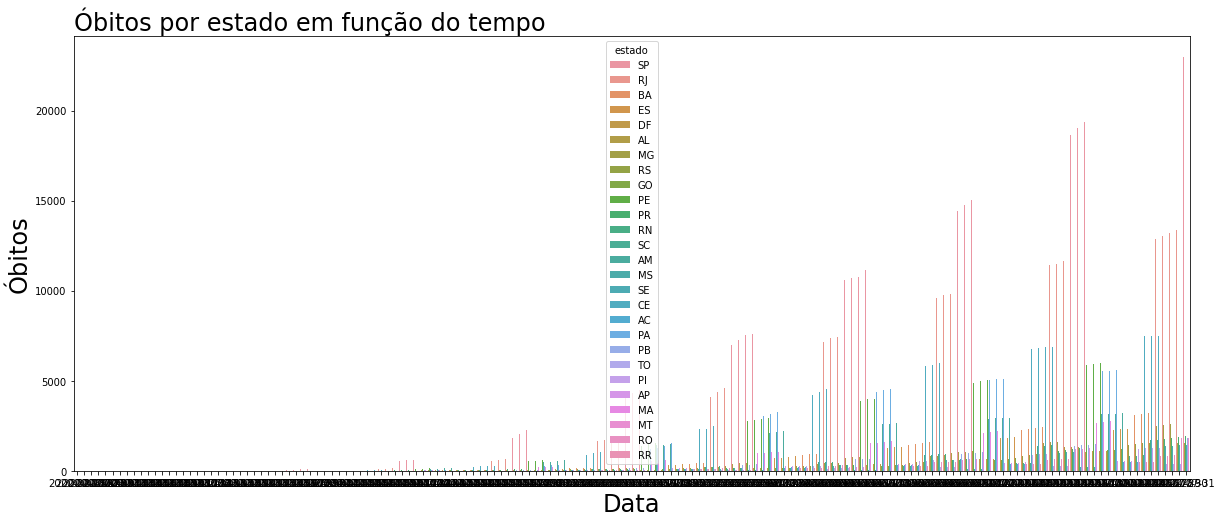

In [9]:
plt.figure(figsize=(20,8))
fig = sns.barplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Óbitos',fontsize=24)

In [10]:
df_geral.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


# Vamos trabalhar com o estado se SP, que tem o maior número de obitos.

In [11]:
df_sp = df[df["estado"] == "SP"]
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

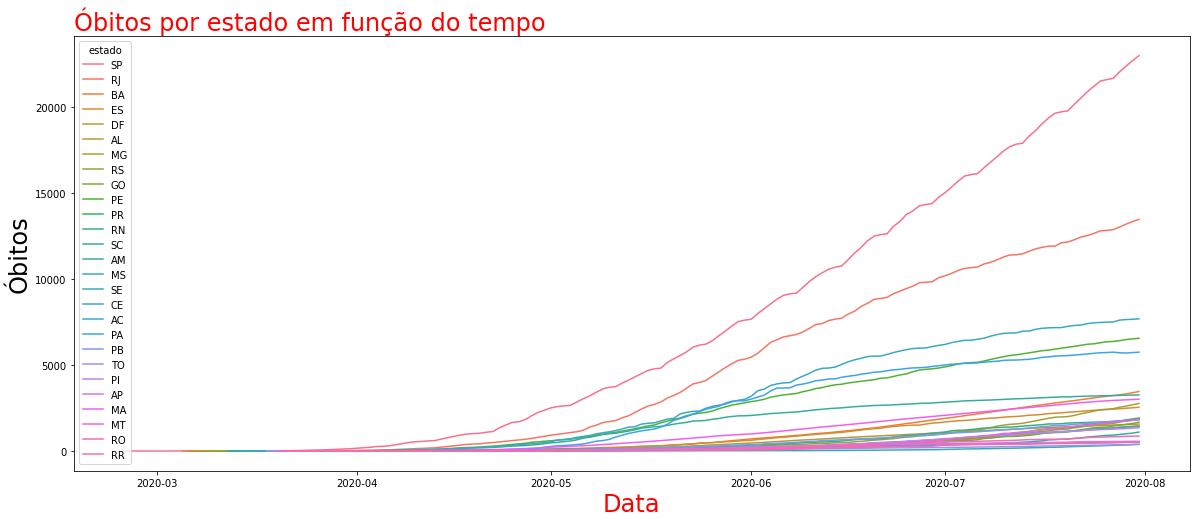

In [12]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left',fontsize=24, color="red")
fig.set_xlabel('Data',fontsize=24,color="red")
fig.set_ylabel('Óbitos',fontsize=24)


In [13]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


# Vamos realizar uma exploratória com o número de suspeitos e recuperados.

In [14]:
suspeitos = df_sp['suspeitos'].max()

print("total de suspeito no estado de sp: {:,})".format(suspeitos))


total de suspeito no estado de sp: 340,112.0)


In [15]:
recuperados = df_sp['recuperados'].max()


print("Total de recuperados no estado de sp: {:,}".format(recuperados))

Total de recuperados no estado de sp: 351,610.0


# 🇧🇷 Pergunta : Qual a taxa de pacientes recuperados ?
Governo de SP divulga pela 1ª vez total de recuperados entre casos leves de Covid-19 e número somado às altas vai a 157 mil.

Percebemos que o número de pacientes recuperados teve uma alta muito brusca no mês de julho. Isso ocorreu porque, no primeiro dia do mês, o estado de São Paulo divulgou, pela primeira vez, o número de recuperados que não precisaram de internação hospitalar. Anteriormente, a secretaria estadual da Saúde calculava apenas o total de altas hospitalares entre pacientes internados com Covid-19:: **negrito**

# Quer obter mais informações ?
link : https://g1.globo.com/sp/sao-paulo/noticia/2020/07/01/governo-de-sp-divulga-pela-1a-vez-total-de-recuperados-entre-casos-leves-de-covid-19-e-numero-somados-as-altas-hospitalares-vai-a-157-mil.ghtml

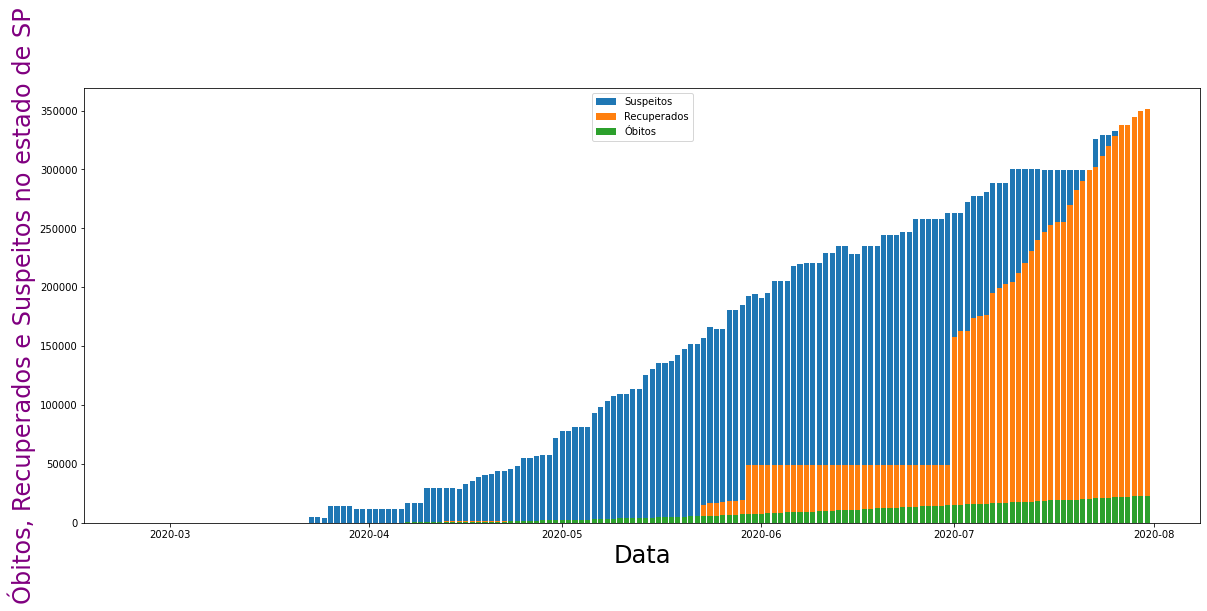

In [16]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data, df_sp.suspeitos,label='Suspeitos')
plt.bar(df_sp.data,df_sp.recuperados,label='Recuperados')
plt.bar(df_sp['data'],df_sp['Obitos'],label='Óbitos')
plt.xlabel('Data',fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP',fontsize=24,color="Purple",rotation=90)
plt.legend()

In [17]:
df_geral.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


# Vamos criar funções no qual será utilizado para plotar gráficos de linhas ou barras.

In [18]:
def plotar_linha(titulo, xlabel, ylabel, x,y,dataset,hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6) #O módulo figura do método set_size_inches() da biblioteca matplotlib é usado para definir o tamanho da figura em polegadas.
    ax.set_title(titulo, loc='left', color="Purple",fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20,rotation=90)

In [19]:
def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',color="Purple",fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20,rotation=90)

# Vamos analisar aceleração obitos e casos.

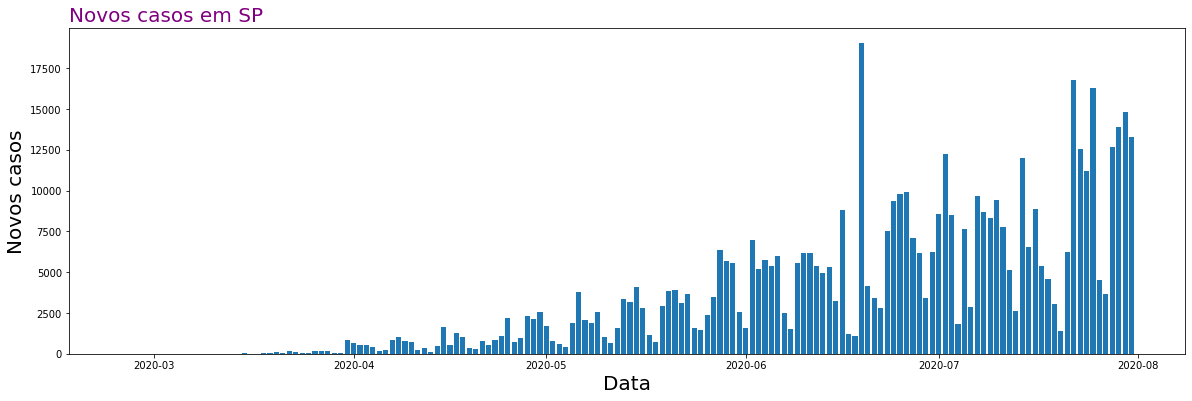

In [20]:
plotar_barra('Novos casos em SP','Data','Novos casos','data','novosCasos',df_sp)

# 🇧🇷 Informações : 

Podemos notar algumas informações importantes. A primeira, conseguimos ver um aumento razoável. Então no início da pandemia a quantidade de novos casos por dia mal chegava a mil.

Depois conseguimos notar uma aceleração no número de casos, e outros dias com números baixos, No meio de julho temos um dia que supostamente houve menos de 2.500 casos por dia, apesar de no dia seguinte termos quase 17.500.

# Vamos analisar um pouco da aceleração dos casos.

In [21]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


# 🇧🇷 Informações : 

Podemos verificar que alguns dos nossos dados parecem um pouco estranhos. Quando plotamos os novos casos em função da data, vimos que alguns dias têm mais casos do que outros. Essa variação é bastante significativa.

# 🇧🇷 Por que isso ocorre?

Na realidade não é que temos mais ou menos casos ou mais ou menos óbitos.
O que temos é uma diminuição na divulgação,porque aos finais de semana, tanto os laboratórios quanto em alguns hospitais estão funcionando em ritmo de plantão. Isso significa que, por exemplo, se você faz o exame da Covid no sábado ou no domingo e o laboratório está em regime de plantão, talvez ele demore para divulgar. Talvez ele não divulgue no domingo, talvez não divulgue na segunda-feira.

E é por isso que no meio da semana temos um número maior porque temos um acúmulo desses casos que não haviam sido divulgados no final de semana e nos finais de semana temos essa diminuição, porque é regime de plantão, nem todos os laboratórios estão funcionando. Às vezes os exames não divulgam os resultados.

In [22]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean() #Por que 14?, Porque normalmente temos uma quarentena de 14 dias ou muitas das vezes os pacientes acabam ficando hospitalizados por esse período ou em isolamento por esse período.
df_sp.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN


<BarContainer object of 158 artists>

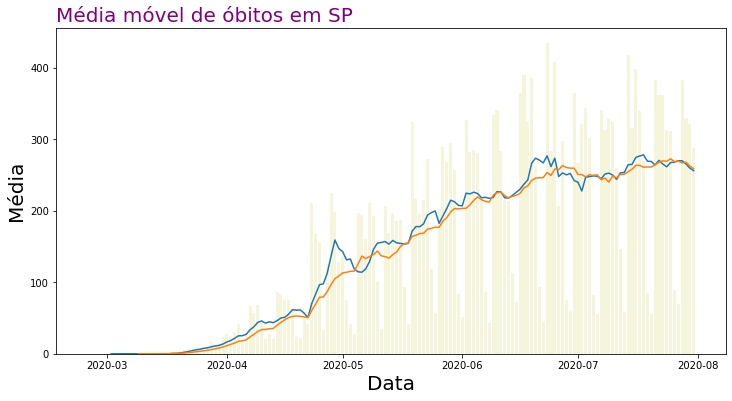

In [23]:
plotar_linha('Média móvel de óbitos em SP','Data','Média','data','mediaObitos',df_sp,None)
plotar_linha('Média móvel de óbitos em SP','Data','Média','data','mediaObitos_14',df_sp,None)
plt.bar(df_sp['data'],df_sp['novosObitos'],color='beige')

 Em cinza temos o gráfico que seria os novos óbitos por dia. Em azul temos a informação de média móvel a cada 7 dias e em laranja a cada 14 dias. Vemos que em laranja ainda temos uma suavização um pouco maior.

# Vamos trabalhar com correlação de óbitos.

**O que são coeficientes de correlação?**

Os coeficientes de correlação são métodos estatísticos para se medir as relações entre variáveis e o que elas representam.

O que a correlação procura entender é como uma variável se comporta em um cenário onde outra está variando, visando identificar se existe alguma relação entre a variabilidade de ambas. Embora não implique em causalidade, o coeficiente de correlação exprime em números essa relação, ou seja, quantifica a relação entre as variáveis.



In [24]:
from pandas.plotting import autocorrelation_plot

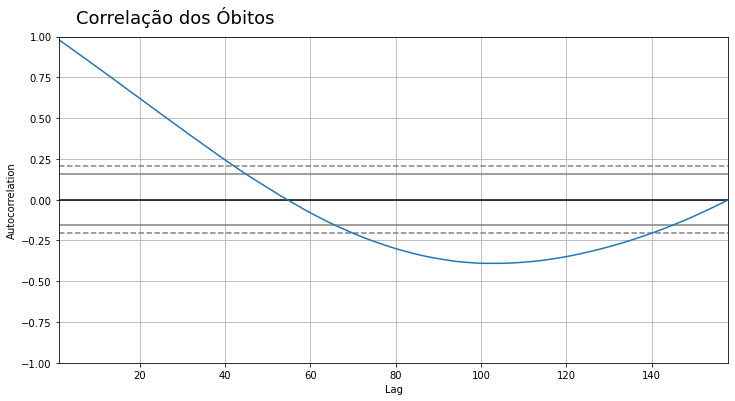

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos Óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['Obitos'])
ax = ax

E o que percebemos dentro disso? É que, por exemplo, quando estamos trabalhando com 10 dias, ou até menos, 7 dias que é uma semana, temos uma autocorrelação extremamente alta. Então ela está maior do que 0.75. 

# Agora vamos plotar a correlação de novos óbitos .

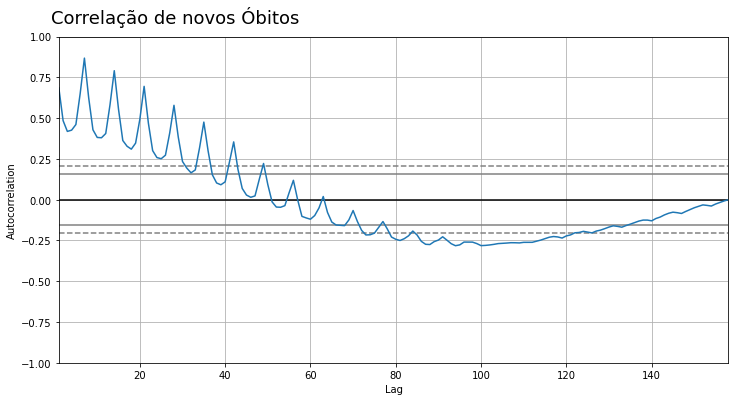

In [28]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação de novos Óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['novosObitos'])
ax=ax

Percebemos que tem uma oscilação quando trabalhamos com novos óbitos ou com novos casos e teríamos o mesmo resultado, mesmo no "plot" de autocorrelação. Isso acontece por causa da sazonalidade.

# Afinal, o que é sazonalidade?

Sazonalidade é quando temos uma variável que tem um comportamento muito parecido e repetitivo ao longo de um determinado período de tempo.

# Exemplo:

Vamos a um exemplo prático:  
Por exemplo, Black Friday. Então todos os anos na época da Black Friday temos um aumento de vendas. A mesma coisa acontece com vendas de passagens aéreas no natal ou casos de gripe na época do inverno. Esses três exemplos são casos de sazonalidade anual.

Ou seja, temos uma autocorrelação alta entre esses períodos e essa variação se dá exatamente ao longo de um ano. No caso desses dados que temos da Covid, percebemos que temos uma autocorrelação alta ao longo da semana.


In [30]:
from datetime import date

In [37]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Saturday


In [38]:
dias_traduzidos = {'Monday':'Segunda','Tuesday':'Terça','Wednesday':'Quarta',
                  'Thursday':'Quinta','Friday':'Sexta','Saturday':'Sabado',
                  'Sunday':'Domingo'}

In [39]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Sabado


In [41]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [42]:
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp.head(7)

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sabado,6786.0,155.0,-17.0,Sabado
Segunda,6887.0,41.0,-20.0,Segunda
Sexta,7342.0,177.0,-13.0,Sexta
Terça,6794.0,206.0,175.0,Terça


In [43]:
agrupados_sp = agrupados_sp.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta',
                                    'Sabado'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


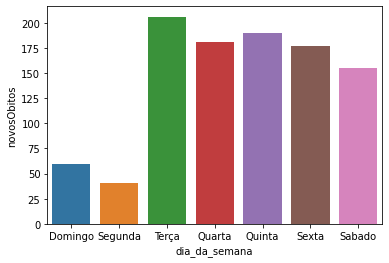

In [44]:
sns.barplot(agrupados_sp['dia_da_semana'],agrupados_sp.novosObitos)

# 🇧🇷  Curiosidade sobre a covid 19, em 2020.

Um novo estudo científico, assinado por pesquisadores do Oriente Médio e publicado na revista Frontiers in Public Health, sugere que é provável que a Covid-19 se torne uma doença sazonal, assim como outras viroses. É o que acontece, por exemplo, com a gripe causada pela influenza.




Quer obter mais informações ?


https://super.abril.com.br/saude/covid-19-deve-se-tornar-doenca-sazonal-sugere-estudo/